In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [9]:
df = pd.read_csv("D:/continuous dataset.csv",parse_dates=['datetime'], index_col=['datetime'])
df.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [10]:
df.shape

(48048, 16)

In [11]:
df = df['nat_demand'].resample('W').sum() 
df[1:273]

datetime
2015-01-11    181919.6224
2015-01-18    188082.3152
2015-01-25    179448.7184
2015-02-01    184393.4256
2015-02-08    187290.1846
                 ...     
2020-02-23    216005.1882
2020-03-01    204924.9816
2020-03-08    219065.4724
2020-03-15    216436.7037
2020-03-22    200434.6963
Freq: W-SUN, Name: nat_demand, Length: 272, dtype: float64

<AxesSubplot:xlabel='datetime'>

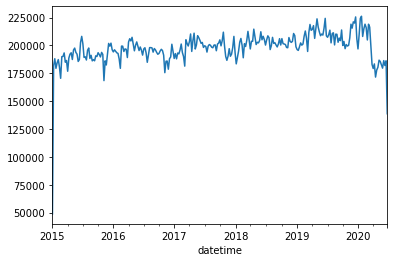

In [12]:
df.plot()

In [13]:
df_train = df[1:219]
df_test = df[219:]
df_train

datetime
2015-01-11    181919.6224
2015-01-18    188082.3152
2015-01-25    179448.7184
2015-02-01    184393.4256
2015-02-08    187290.1846
                 ...     
2019-02-10    201242.6850
2019-02-17    208250.3819
2019-02-24    212958.4837
2019-03-03    206597.3827
2019-03-10    194613.5590
Freq: W-SUN, Name: nat_demand, Length: 218, dtype: float64

In [14]:
adfuller(df_train)

(-3.0005475857636137,
 0.03484329428925003,
 5,
 212,
 {'1%': -3.4615775784078466,
  '5%': -2.875271898983725,
  '10%': -2.5740891037735847},
 4076.1495684966294)

p-value less than 0.05 indicates that the null hypothesis can be rejected and the distribution is stationary

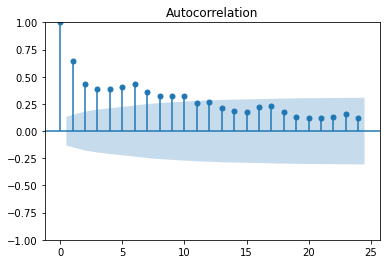

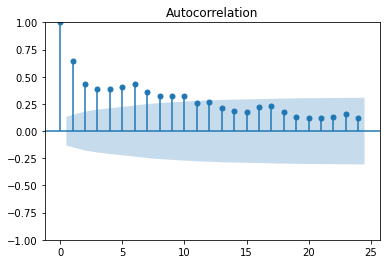

In [15]:
plot_acf(df_train)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


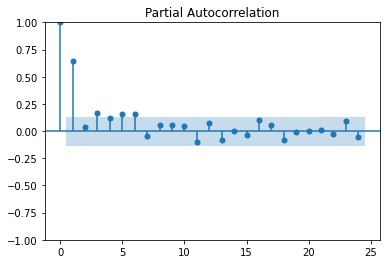

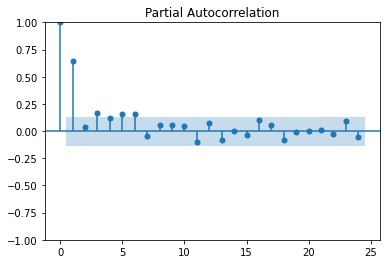

In [16]:
plot_pacf(df_train)

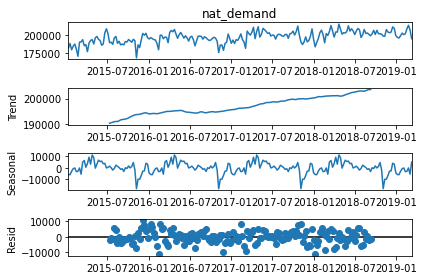

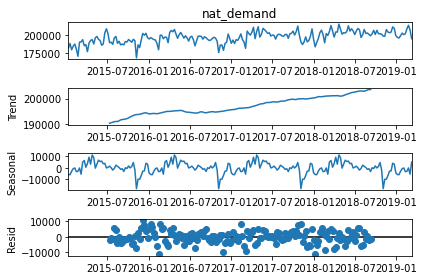

In [17]:
decomp = sm.tsa.seasonal_decompose(df_train,model = 'additive')
decomp.plot()

In [18]:
model = ARIMA(df_train, exog=None, order=(1,0,3) ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             nat_demand   No. Observations:                  218
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -2198.953
Date:                Mon, 07 Aug 2023   AIC                           4409.907
Time:                        05:02:05   BIC                           4430.214
Sample:                    01-11-2015   HQIC                          4418.109
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.967e+05   3458.805     56.870      0.000     1.9e+05    2.03e+05
ar.L1          0.9756      0.022     44.499      0.000       0.933       1.019
ma.L1         -0.4276      0.069     -6.161      0.000      -0.564      -0.292
ma.L2         -0.3184      0.072     -4.436      0.000      -0.459      -0.178
ma.L3         -0.0170      0.065     -0.263      0.793      -0.144       0.110
sigma2      3.261e+07      0.276   1.18e+08      0.000    3.26e+07    3.26e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                12.57
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.23
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.58e+23. Standard errors may be unstable.
"""

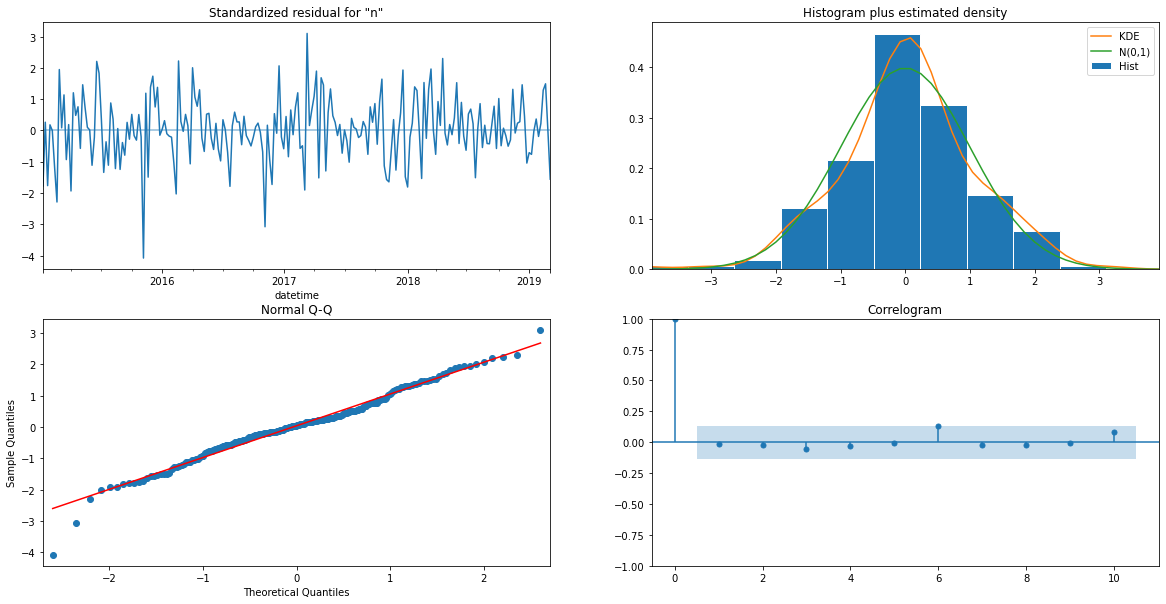

In [19]:
model.plot_diagnostics(figsize=(20,10))
plt.show()

In [20]:
pred = model.predict(start = len(df_train),end = len(df)-2)
print("The RMSE for the model is: "+ str(np.sqrt(mean_squared_error(df_test,pred))))

The RMSE for the model is: 16138.273393225734


<AxesSubplot:xlabel='datetime'>

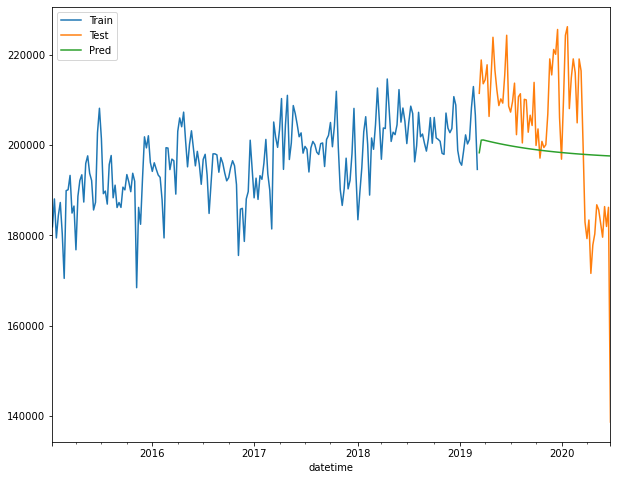

In [21]:
df_train.plot(legend = True,label = 'Train', figsize=(10,8))
df_test.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'Pred')

In [22]:
arima= auto_arima(df_train,trace=True, error_action='ignore', test = 'adf',
                         start_p=1,start_q=1,max_p=10,max_q=10,m=1, D=0, 
                   suppress_warnings=True,stepwise=True,seasonal=False)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4437.412, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5935.612, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5779.871, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4472.202, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4414.221, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5745.513, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4416.058, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5738.368, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4420.899, Time=0.23 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 2.335 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2203.110
Date:                Mon, 07 Aug 2023   AIC                           4414.221
Time:                        05:02:09   BIC                           4427.759
Sample:                    01-11-2015   HQIC                          4419.689
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   4149.226      0.000       1.000       1.000
ma.L1         -0.4555      0.058     -7.897      0.000      -0.569      -0.342
ma.L2         -0.3415      0.062     -5.496      0.000      -0.463      -0.220
sigma2      3.388e+07   5.78e-11   5.87e+17      0.000    3.39e+07    3.39e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 9.47
Prob(Q):                              0.94   Prob(JB):                         0.01
Heteroskedasticity (H):               0.70   Skew:                            -0.14
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.53e+35. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='datetime'>

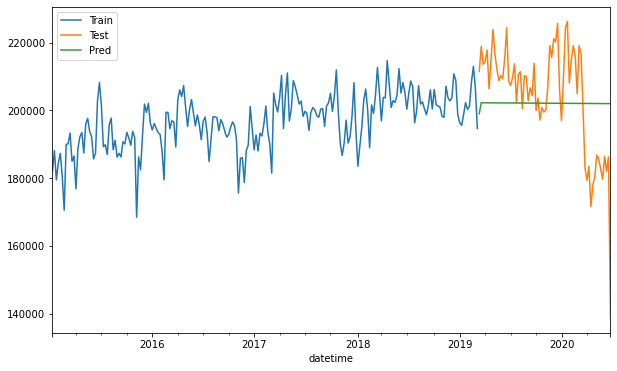

In [23]:
pred = arima.predict(n_periods = len(df_test) )
df_train.plot(legend = True,label = 'Train', figsize=(10,6))
df_test.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'Pred')

In [24]:
print("The RMSE is: "+ str(np.sqrt(mean_squared_error(df_test,pred))))

The RMSE is: 15841.666849354942


In [25]:
df = pd.read_csv("D:/continuous dataset.csv",parse_dates=['datetime'], index_col=['datetime'])
df_exog = df.resample('W').sum().iloc[:,1:]
exog_train = df_exog[1:219]
exog_test = df_exog[219:]

In [26]:
arimax= auto_arima(df_train,trace=True, X = exog_train[['T2M_toc','TQL_toc','QV2M_san','QV2M_dav','holiday']] 
                   , error_action='ignore', test = 'adf', approximation=False
                   , start_p=0,start_q=0,max_p=10,max_q=10,m=1, D=0,  
                   suppress_warnings=True,stepwise=True,seasonal=False)
arimax.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5462.679, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4280.638, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4384.785, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4270.828, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4262.930, Time=0.51 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4259.270, Time=0.50 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4256.181, Time=0.55 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=4257.693, Time=0.81 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=4252.689, Time=0.95 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4250.772, Time=0.73 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4249.514, Time=0.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4247.501, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4255.627, Time=0.45 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4248.734, Time=0.87 sec
 ARIMA(1,0,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -2114.751
Date:                Mon, 07 Aug 2023   AIC                           4247.501
Time:                        05:02:20   BIC                           4277.962
Sample:                    01-11-2015   HQIC                          4259.805
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T2M_toc       43.3606      2.333     18.588      0.000      38.788      47.933
TQL_toc     -348.0563     68.547     -5.078      0.000    -482.406    -213.707
QV2M_san    4.286e+04   6499.229      6.594      0.000    3.01e+04    5.56e+04
QV2M_dav     -4.5e+04   7999.933     -5.624      0.000   -6.07e+04   -2.93e+04
holiday     -150.5485     12.609    -11.940      0.000    -175.262    -125.835
ar.L1          1.3543      0.091     14.819      0.000       1.175       1.533
ar.L2         -0.3565      0.090     -3.971      0.000      -0.533      -0.181
ma.L1         -0.8890      0.055    -16.054      0.000      -0.997      -0.780
sigma2      1.675e+07     18.439   9.08e+05      0.000    1.67e+07    1.67e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.74   Prob(JB):                         0.48
Heteroskedasticity (H):               1.27   Skew:                             0.12
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.31e+21. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='datetime'>

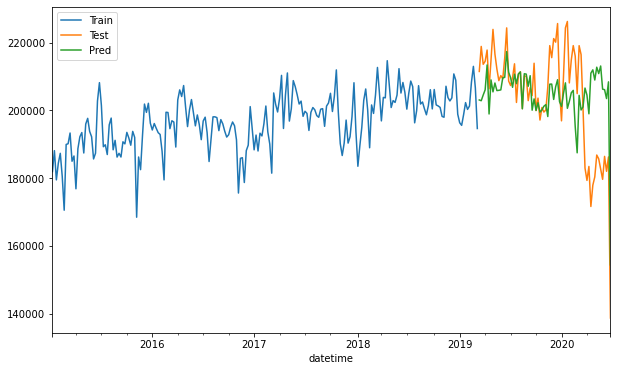

In [27]:
pred = arimax.predict(n_periods = len(df_test),X = exog_test[['T2M_toc','TQL_toc','QV2M_san','QV2M_dav','holiday']] )
df_train.plot(legend = True,label = 'Train', figsize=(10,6)) 
df_test.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'Pred')

In [28]:
print("The RMSE for model with exogenous variables is: "+ str(np.sqrt(mean_squared_error(df_test,pred))))

The RMSE for model with exogenous variables is: 14550.656074296992


In [29]:
arimax= auto_arima(df_train,trace=True, X = exog_train
                   , error_action='ignore', test = 'adf', approximation=False
                   , start_p=0,start_q=0,max_p=10,max_q=10,m=1, D=0,
                   suppress_warnings=True,stepwise=True,seasonal=False)
arimax.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5459.852, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4289.752, Time=0.91 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4407.019, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4271.451, Time=1.24 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4266.394, Time=1.36 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4268.088, Time=1.69 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4256.033, Time=1.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4253.365, Time=1.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4256.473, Time=1.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4248.213, Time=1.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4251.713, Time=1.18 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4249.356, Time=1.38 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.29 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4254.642, Time=1.34 sec
 ARIMA(3,0,3)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2104.107
Date:                Mon, 07 Aug 2023   AIC                           4248.213
Time:                        05:02:39   BIC                           4315.903
Sample:                    01-11-2015   HQIC                          4275.554
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T2M_toc       36.9467      8.671      4.261      0.000      19.952      53.941
QV2M_toc   -6116.6961   8570.733     -0.714      0.475   -2.29e+04    1.07e+04
TQL_toc     -428.5435    133.927     -3.200      0.001    -691.036    -166.051
W2M_toc        1.3511      1.295      1.043      0.297      -1.187       3.889
T2M_san       -0.5405      8.280     -0.065      0.948     -16.770      15.689
QV2M_san    3.304e+04   1.05e+04      3.158      0.002    1.25e+04    5.35e+04
TQL_san     -130.4566    130.886     -0.997      0.319    -386.989     126.076
W2M_san        3.0363      2.705      1.122      0.262      -2.266       8.339
T2M_dav        8.0864     11.990      0.674      0.500     -15.414      31.586
QV2M_dav   -2.877e+04   1.08e+04     -2.663      0.008   -4.99e+04   -7591.797
TQL_dav      320.2163    101.633      3.151      0.002     121.019     519.414
W2M_dav       -7.0116      5.507     -1.273      0.203     -17.805       3.782
Holiday_ID     1.3246      2.854      0.464      0.643      -4.269       6.918
holiday     -175.6392     34.024     -5.162      0.000    -242.324    -108.954
school         5.7913      7.353      0.788      0.431      -8.620      20.203
ar.L1          0.2120      0.087      2.447      0.014       0.042       0.382
ar.L2          0.7826      0.088      8.928      0.000       0.611       0.954
ma.L1          0.1855      0.079      2.334      0.020       0.030       0.341
ma.L2         -0.7713      0.078     -9.883      0.000      -0.924      -0.618
sigma2      1.701e+07     22.129   7.69e+05      0.000     1.7e+07     1.7e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.55   Prob(JB):                         0.88
Heteroskedasticity (H):               1.25   Skew:                             0.07
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.11e+21. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='datetime'>

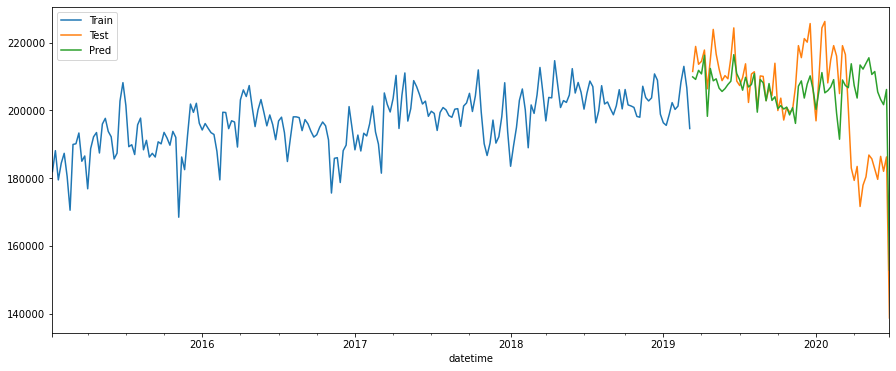

In [30]:
pred = arimax.predict(n_periods = len(df_test),X = exog_test)
df_train.plot(legend = True,label = 'Train', figsize=(15,6)) 
df_test.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'Pred')

In [31]:
print("The RMSE for model with all exogenous variables included is: "+ str(np.sqrt(mean_squared_error(df_test,pred))))

The RMSE for model with all exogenous variables included is: 14209.64317028374


In [32]:
print("The MAPE for model with all exogenous variables included is: "+ str(np.sqrt(mean_absolute_percentage_error(df_test,pred))))

The MAPE for model with all exogenous variables included is: 0.22768293082891866
